# METHODOLOGY Part 2
Table content
* [4.1 Datasets](#4.1Datasets)
* [4.2 Efficiency Analysis](#4.2EfficiencyAnalysis)
* [4.3 Effectiveness Analysis](#4.3EffectivenessAnalysis)
    * [4.3.3 Relation Properties](#4.3.1NumberofPeers)
    * [4.3.4 Reified Relations](#4.3.4ReifiedRelations)

### 4.3.3 Relation Properties
Tùy thuộc vào ngữ nghĩa của chúng, các mối quan hệ có thể được đặc trưng bởi một số tính chất phụ thuộc rất nhiều vào cách thức chúng xuất hiện trong thực tế. Các tính chất như vậy đã được biết đến trong tài liệu LP trong một thời gian dài, bởi vì chúng có thể dẫn đến một mối quan hệ để hình thành các cấu trúc và các mẫu rất cụ thể trong đồ thị; điều này, tùy thuộc vào mô hình, có thể làm cho *fact* của họ dễ dàng hơn hoặc khó hơn để tìm hiểu và dự đoán.

Như một vấn đề *fact* (thực tế), tùy thuộc vào chức năng chấm điểm của họ, một số mô hình thậm chí có thể không có khả năng học một số loại quan hệ chính xác. Ví dụ, [TransE-8](../papers/models/8_TransE.pdf) và một số mô hình kế nhiệm của nó vốn không thể học được các mối quan hệ đối xứng và bắc cầu do bản chất của bản dịch. Tương tự, [DistMult 71](../papers/models/71_DistMult.pdf) không thể xử lý các mối quan hệ đối xứng, bởi vì với bất kỳ *fact* nào $\langle$ *h, r, t* $\rangle$, nó cũng gán cùng một số điểm cho $\langle$ *t, r, h* $\rangle$.

điều này đã khiến một số nghiên cứu chính thức đưa ra khái niệm về ***full expressiveness*** (tính biểu cảm đầy đủ) [full expressiveness-27](../papers/models/27_SimplE.pdf): một mô hình ***full expressiveness***  nếu, với bất kỳ đồ thị hợp lệ nào, tồn tại ít nhất một kết hợp các giá trị *embedding* (nhúng) cho mô hình phân tách chính xác tất cả các bộ ba chính xác với các bộ ba không chính xác . Một mô hình ***full expressiveness*** có tiềm năng lý thuyết để tìm hiểu chính xác bất kỳ đồ thị hợp lệ nào, mà không bị cản trở bởi các giới hạn nội tại. Ví dụ về các mô hình đã được chứng minh là ***full expressiveness*** là [SimplE-27](../papers/models/27_SimplE.pdf), [TuckER-6](../papers/models/6_TuckER.pdf), [ComplEx-61](../papers/models/61_ComplEX.pdf) và [HolE-60](../papers/models/60_Complex_and_Holographic_Embeddings_of_Knowledge_Graphs.pdf).

Tuy Có khả năng học hỏi các mối quan hệ nhất định, tuy nhiên, không nhất thiết có nghĩa là đạt được hiệu suất tốt đối với họ. Ngay cả đối với các mô hình ***full expressiveness***, các thuộc tính nhất định có thể khó xử lý hơn các mô hình khác. Ví dụ, [Meilicke et al. 37](../papers/models/46_HolE.pdf), [RESCAL 44](../papers/models/44_RESCAL.pdf) và [TransE 8](../papers/models/8_TransE.pdf) của họ thực hiện như thế nào trên các mối quan hệ đối xứng trong các bộ dữ liệu khác nhau; họ báo cáo kết quả xấu đáng ngạc nhiên cho HolE về mối quan hệ đối xứng trong FB15K, mặc dù HolE ***full expressiveness***).

Về vấn đề này, chúng tôi dẫn đầu một phân tích hệ thống: chúng tôi tạo ra một tập hợp toàn diện các thuộc tính quan hệ và xác minh cách chúng tạo ra hiệu suất cho tất cả các mô hình của chúng tôi.

Chúng tôi tính đến các thuộc tính sau:

* Reflexivity(Phản xạ): trong định nghĩa ban đầu, một mối quan hệ phản xạ kết nối từng phần tử với chính nó (có cạnh khuyên). điều này không phù hợp với $KG$, trong đó các thực thể khác nhau chỉ có thể liên quan đến một số quan hệ, dựa trên loại của chúng. Kết quả là, trong phân tích của chúng tôi, chúng tôi sử dụng định nghĩa sau: $ \forall r \in \mathcal{R} \text{ là Reflexivity nếu } \langle h, r, t \rangle \in \mathcal{G}_{train}, \ \langle h, r, h \rangle \in \mathcal{G}_{train}$.
* Irreflexivity:$ \forall r \in \mathcal{R} \text{ Irreflexivity } \forall e \in \mathcal{E}, \langle e, r, r \rangle  \notin \mathcal{G}_{train}$
* Symmetry (đối xứng):$ \forall r \in mathcal{R} \text{ là Symmetry nếu} \forall \langle h, r, t \rangle \in \mathcal{G}, \ \langle t, r, h \rangle \in \mathcal{G}$
* Anti-symmetry (bất đối xứng):$ \forall r \in \mathcal{R} \text{ là anti-symmetry nếu} \forall \langle h, r, t \rangle \in \mathcal{G}, \ \langle t, r, h \rangle \notin \mathcal{G}$
* Transitivity (bắc cầu):$ \forall r \in \mathcal{R} \text{ transitive nếu } \forall \text{ cặp } \langle h, r, x \rangle \in \mathcal{G} \text{ và } \langle x, r, t \rangle \in  \mathcal{G} \text{ thì } \langle h, r, t \rangle \in  \mathcal{G}$

Chúng tôi không xem xét các thuộc tính khác, chẳng hạn như *Equivalence and Order* (Tương đương và Thứ tự) (một phần hoặc hoàn chỉnh), vì chúng tôi đã quan sát bằng thực nghiệm rằng trong tất cả các bộ dữ liệu có trong phân tích của chúng tôi, chỉ có một số lượng không đáng kể các sự kiện sẽ được đưa vào các báo cáo kết quả.

Trên mỗi tập dữ liệu, chúng tôi sử dụng cách tiếp cận sau đây. Đầu tiên, đối với mỗi mối quan hệ trong bộ dữ liệu, chúng tôi trích xuất các *training fact* tương ứng và sử dụng chúng để xác định các thuộc tính của nó. Do tính không hoàn chỉnh vốn có của tập huấn luyện, chúng tôi sử dụng *tolerance threshold*: một thuộc tính được xác minh nếu tỷ lệ các sự kiện đào tạo cho thấy hành vi tương ứng vượt quá ngưỡng. Trong tất cả các thí nghiệm của chúng tôi, chúng tôi đặt *tolerance* là $0.5$. Vì vậy, chúng tôi nhóm các *test facts* (sự kiện kiểm tra) dựa trên các thuộc tính của mối quan hệ của họ. Nếu một mối quan hệ sở hữu nhiều thuộc tính, các *test facts* của nó sẽ thuộc về nhiều nhóm. Cuối cùng, chúng tôi tính toán hiệu suất dự đoán được ghi bởi từng mô hình trên từng nhóm *test facts*.

Chúng tôi báo cáo kết quả của chúng tôi về các thuộc tính quan hệ trong Phần 5.3.3.

### 4.3.4 Reified Relations
Một số KG hỗ trợ quan hệ với cardinality lớn hơn 2, kết nối nhiều hơn hai thực thể cùng một lúc. Trong các mối quan hệ, cardinality liên quan chặt chẽ đến ngữ nghĩa và một số quan hệ vốn đã có ý nghĩa hơn khi được mô hình hóa theo cách này. Ví dụ, một diễn viên giành được giải thưởng cho diễn xuất của cô ấy trong một bộ phim có thể được mô hình hóa với mối quan hệ độc đáo kết nối diễn viên, giải thưởng và bộ phim. Các KG hỗ trợ quan hệ với cardinality lớn hơn 2 thường xử lý chúng theo một trong các cách sau:

* sử dụng **hyper-graphs** (siêu đồ thị): trong một *hyper-graphs* (siêu đồ thị), mỗi *hyper-edge* (siêu cạnh) có thể liên kết nhiều hơn hai ***node*** cùng một lúc theo thiết kế. Siêu đồ thị không thể được biểu thị trực tiếp dưới dạng một tập hợp các *triples* (bộ ba).
* sử dụng **reification** (sự hợp nhất hóa): nếu một mối quan hệ cần kết nối nhiều thực thể, nó được mô hình hóa với một ***node*** trung gian được liên kết với các thực thể đó bằng quan hệ nhị phân. do đó, số lượng quan hệ trở thành **degree** (bậc) của ***reified node*** (nút thống nhất). ***Reification*** cho phép các mối quan hệ với **cardinality** lớn hơn 2 được mô hình hóa gián tiếp; do đó, đồ thị vẫn có thể biểu diễn dưới dạng một tập hợp các **triples**-bộ ba.

KG FreeBase phổ biến, đã được sử dụng để tạo các bộ dữ liệu LP quan trọng như FB15k và FB15k-237, sử dụng các ***reified relations*** (mối quan hệ hợp nhất), với các **node** trung gian thuộc loại ***Compound Value Type***(CVT-Giá trị hợp chất). Bằng cách mở rộng, chúng tôi đề cập đến các **node** trung gian như CVT.

Trong quá trình trích xuất FB15k từ [FreeBase-8](../papers/models/8_TransE.pdf), CVT đã bị xóa và chuyển đổi thành các cụm trong đó các thực thể được kết nối với CVT trước đây được kết nối với nhau; các nhãn của các cạnh mới thu được nối các cạnh cũ tương ứng. điều này cũng áp dụng cho FB15k-237, thu được bằng cách lấy mẫu [FB15k-57](../papers/datasets/57_FB15k-237.pdf). Nó đã được chỉ ra rằng việc chuyển đổi này, được đặt tên là **Star-to-Clique** (S2C), là không thể đảo ngược [ irreversible-68](../papers/68_On_the_representation_and_embedding_of_knowledge_bases_beyond_binary_relations.pdf). Trong nghiên cứu của chúng tôi, chúng tôi đã quan sát thấy hiệu quả hơn nữa đối với chính sách S2C:

* Từ quan điểm cấu trúc, $S2C$ *transforms* $CVT$ với *degree*(bậc) $n$ thành một cụm với nhiều nhất là $n!$ các cạnh. Do đó, một số phần của đồ thị trở nên *denser than before* (dày đặc hơn trước đây). Các cạnh được tạo ra không quá dư thừa và trong quá trình lọc được vận hành để tạo *FB15k-237*, nhiều trong số chúng được loại bỏ.
* Từ quan điểm ngữ nghĩa, ý nghĩa ban đầu của các mối quan hệ bị thay đổi rất nhiều. Một khai phá $CVT$ thành các cụm, sự trùng lặp được thực hiện: nếu hai thực thể giống nhau được liên kết nhiều lần bởi cùng một loại quan hệ bằng cách sử dụng nhiều CVT - ví dụ: một nghệ sĩ giành được nhiều giải thưởng cho cùng một tác phẩm - thông tin này bị mất, như trong Hình 4. Nói cách khác, trong *new semantics* (ngữ nghĩa mới), mỗi *fact* (thực tế) đã *at least once* (xảy ra ít nhất một lần).

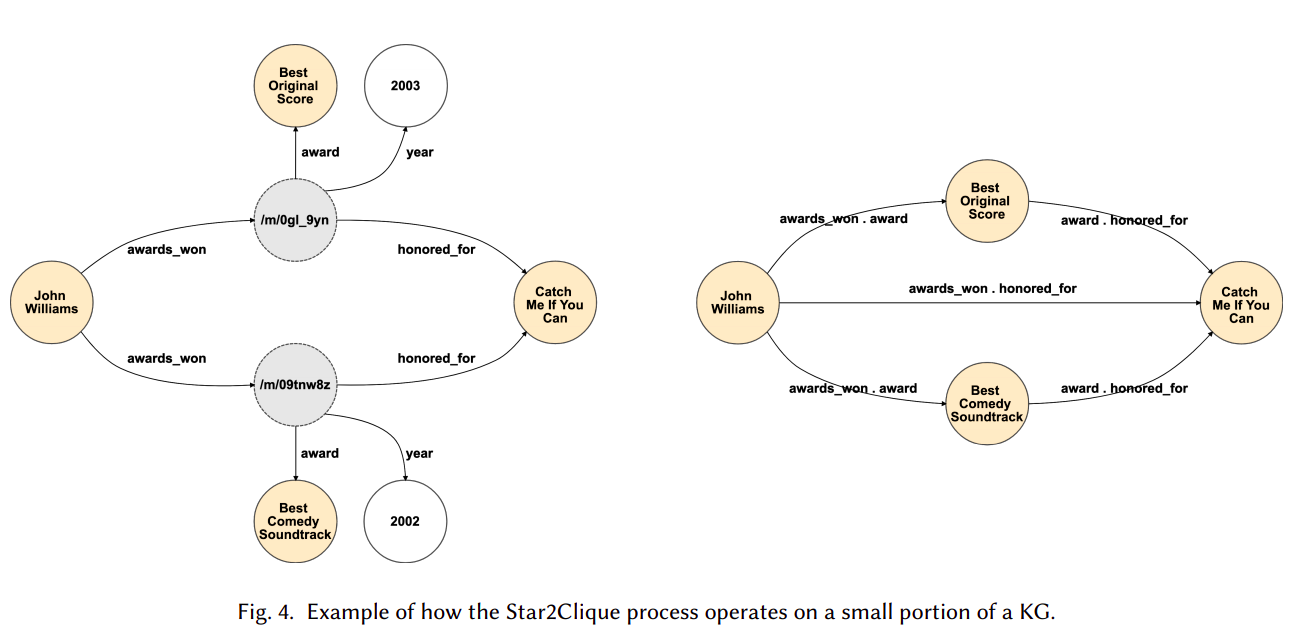

In [2]:

from IPython.display import Image
Image(filename='../images/fig-4_KG.png')